In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def plot_image_fft(image: np.array) -> None:
    """
    Plota a imagem, calculando a transformada rápida de Fourier,
    plotando também a magnitude e fase na frequência.
    """
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    magnitude = np.log(np.abs(image_fft))
    phase = np.angle(image_fft)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    axs[0].imshow(image, cmap='gray')
    axs[1].imshow(magnitude, cmap='gray')
    axs[2].imshow(phase, cmap='gray')
    axs[0].set_title('Original')
    axs[1].set_title('Magnitude')
    axs[2].set_title('Phase')
    plt.show()

def image_normalize(image: np.array) -> np.array:
    """
    Normaliza a imagem para melhorar o contraste.
    Isto é, faz o alargamento de contraste.
    """
    lmin = float(image.min())
    lmax = float(image.max())
    return np.floor((image - lmin)/(lmax-lmin) * 255)
    

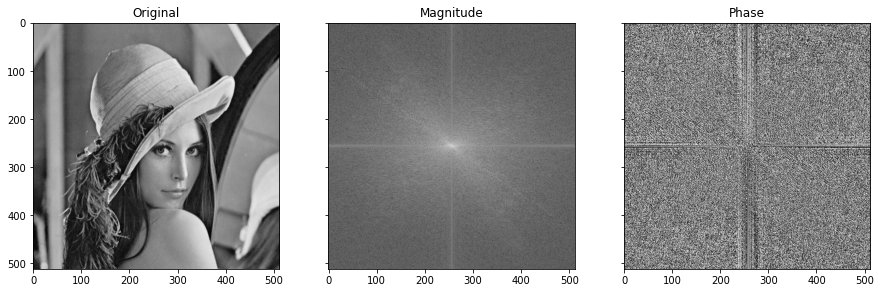

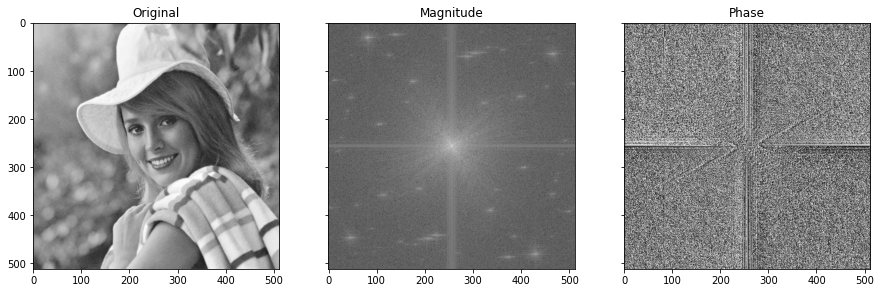

In [8]:
lena = plt.imread('../images/lena.tif').astype('uint8')
plot_image_fft(lena)

elaine = plt.imread('../images/elaine.tiff').astype('uint8')
plot_image_fft(elaine)

In [9]:
# Elaine image
elaine_fft = np.fft.fft2(elaine)
elaine_fft_shifted = np.fft.fftshift(elaine_fft)
elaine_mag = np.log(np.abs(elaine_fft_shifted))
elaine_pha = np.angle(elaine_fft_shifted)

# lena image
lena_fft = np.fft.fft2(lena)
lena_fft_shifted = np.fft.fftshift(lena_fft)
lena_mag = np.log(np.abs(lena_fft_shifted))
lena_pha = np.angle(lena_fft_shifted)

# Change phases
lena_combined = np.multiply(np.abs(lena_fft), np.exp(1j*np.angle(elaine_fft)))
elaine_combined = np.multiply(np.abs(elaine_fft), np.exp(1j*np.angle(lena_fft)))

# Get inverse fourier
new_lena = np.real(np.fft.ifft2(lena_combined))
new_elaine = np.real(np.fft.ifft2(elaine_combined))

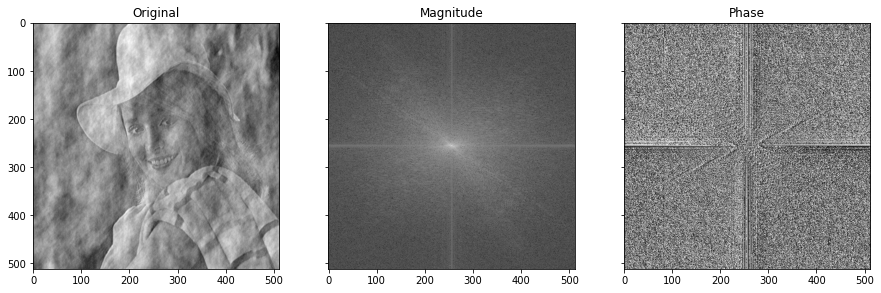

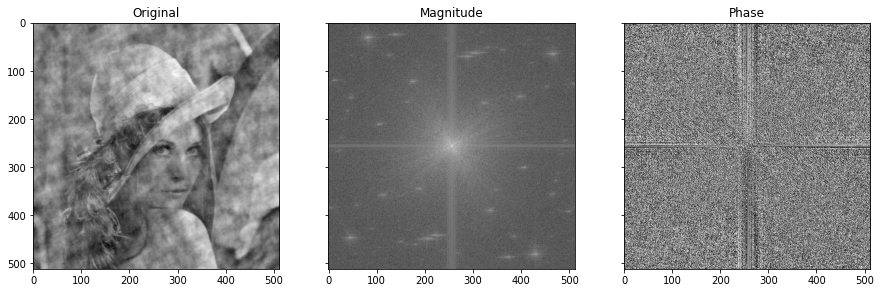

In [10]:
# plot merged images
plot_image_fft(image_normalize(new_lena))
plot_image_fft(image_normalize(new_elaine))

Observa-se que a fase carrega muita informação das imagens. Ainda que seja possível observamos semelhanças com as imagens originais, destaca-se que as silhuetas da lena e elaine foram trocadas devido a troca de fase efetuada. Devido a alteração das fases, introduziu-se uma série de ruídos nas imagens resultantes, uma vez que a magnitude atrapalha na formação original das imagens.